length: 6
['#c60d77', '#00a2e8', '#22b14c', '#fff200', '#b97a57', '#000000']


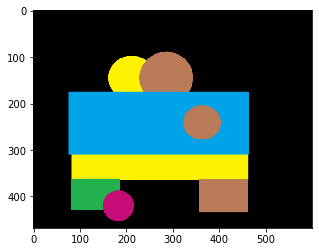

Image mode:  RGB


In [24]:
import cv2
import numpy as np
from PIL import Image,ImageDraw,ImageColor,ImageFont
import matplotlib.pyplot as plt
import matplotlib
import webcolors
import os
#################### Global variables ##########################

file_name='resizedexample'
file_name2="example"
####################################################
def show_image(img):
    plt.imshow(img, interpolation='nearest')
    plt.show()
    img = Image.fromarray(img)
    print("Image mode: ",img.mode)
####################################################

def getTopColorPallete(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(webcolors.rgb_to_hex(colors[i][1]))
        
    print("length:",len(colorlist))
    return colorlist
####################################################
file_path ='resized/'+file_name+'.png'
file_path2='sampleImages/'+file_name2+'.png'
cv_img = cv2.imread(file_path)

####################################################
topclr_list=getTopColorPallete(file_path2)
print(topclr_list)
show_image(cv_img)

[198  13 119]


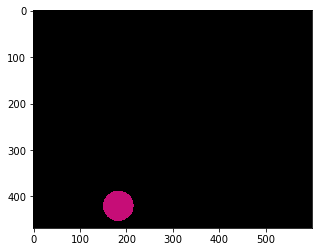

[  0 162 232]


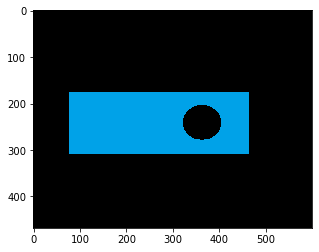

[ 34 177  76]


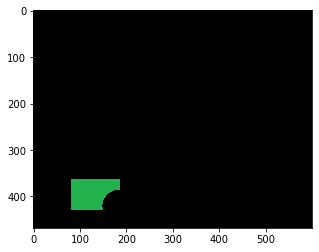

[255 242   0]


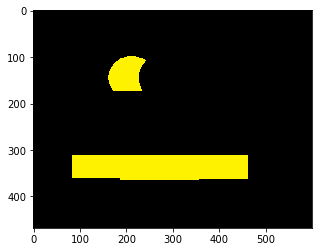

[185 122  87]


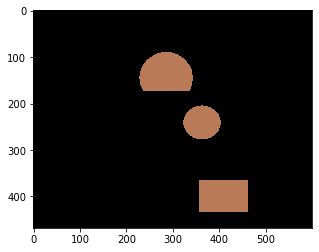

In [25]:
def GetMaskSegment(rgb_image):
    low=[np.array([197, 12, 118]),np.array([0, 161, 231]),np.array([33, 176, 75]),np.array([254, 241, 0]),np.array([184, 121, 86])]
    high=[np.array([198, 13, 119]),np.array([0, 162, 232]),np.array([34, 177, 76]),np.array([255, 242, 0]),np.array([185, 122, 87])]
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append([res,high[i]])
        
    return imglists

img_list=GetMaskSegment(cv_img)

for i in range(len(img_list)):
    print(img_list[i][1])
    plt.imshow(img_list[i][0], interpolation='nearest')
    plt.show()

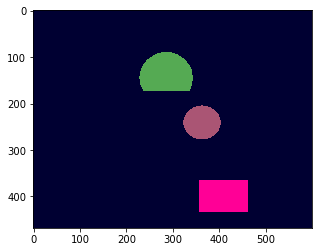

Image mode:  RGB


In [32]:
def apply_lut(src, lut):
    dst = lut[src]
    return dst

def ComponentLabeling(img):
    img=RGBtoGrayImage(img)
    
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    n_components, component_ids = cv2.connectedComponents(mask)

    # Initialize look up tables with arbitrary data for demonstration
    LUT1 = np.linspace(0, 255, n_components).astype(np.uint16)
    LUT2 = np.linspace(255, 0, n_components).astype(np.uint16)
    LUT3 = np.linspace(50, 150, n_components).astype(np.uint16)
    LUT2[0] = 0

    r = apply_lut(component_ids, LUT1)
    g = apply_lut(component_ids, LUT2)
    b = apply_lut(component_ids, LUT3)

    rgb = np.dstack((r, g, b)).astype(np.uint8)
    
    return rgb

def RGBtoGrayImage(rgbimg):
    grayImage = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return im_bw

label_img=ComponentLabeling(img_list[4][0])

show_image(label_img)

In [27]:
def GetAllPixValues(img):
    print("Getting all pixel list...")
    rows,cols,_ = img.shape
    pixlist=[]
    for i in range(rows):
        for j in range(cols):
            pixlist.append(webcolors.rgb_to_hex(img[i,j]))
    print("length:",len(pixlist))
    return pixlist


def getUniqueListValue(Inputlist):
    print("Getting unique values of the list...")
    unique_list = []
    for x in Inputlist:
        if x not in unique_list:
            unique_list.append(x)
    
    print("length:",len(unique_list))
    return unique_list

def SeeOccurrences(test_list):
    print("Getting occurred list...")
    res = []
    count = 1
    for ele in range(0, len(test_list) -1):
        if test_list[ele] != test_list[ele + 1]:
            res.append((test_list[ele],count))
            count = 1
        else :
            count = count + 1
    res.append((test_list[len(test_list) -1], count))
    
    print("length:",len(res))
    return res

def RemoveSpecificValue(input_list,val):
    new_list=[]
    for i in input_list:
        if(i!=val):
            new_list.append(i)
    return new_list

def GetBgPixVal(img):
    (r,g,b) = img[0, 0]
    a='#%02x%02x%02x' % (r,g,b)
    return a

In [33]:
def getColorPalette(img): 
    label_pix=GetAllPixValues(img)
    BgPix=GetBgPixVal(img)
    label_pix=RemoveSpecificValue(label_pix,BgPix) 
    unq_label_pix=getUniqueListValue(label_pix)
    
    return unq_label_pix

unq_pixlist=getColorPalette(label_img)
print(unq_pixlist)

Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 3
['#55aa53', '#aa5574', '#ff0096']


[ 85 170  83]


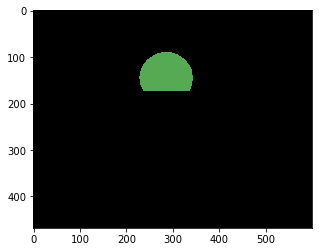

[170  85 116]


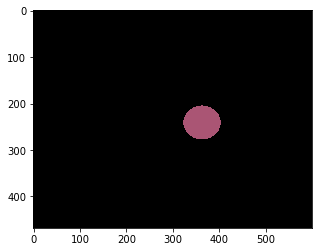

[255   0 150]


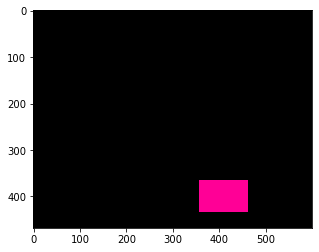

In [34]:
def GetMaskSegment2(rgb_image):
    low=[np.array([84, 169, 82]),np.array([169, 84, 115]),np.array([254, 0, 149])]
    high=[np.array([85, 170, 83]),np.array([170, 85, 116]),np.array([255, 0, 150])]
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append([res,high[i]])
        
    return imglists

img_list2=GetMaskSegment2(label_img)

for i in range(len(img_list2)):
    print(img_list2[i][1])
    plt.imshow(img_list2[i][0], interpolation='nearest')
    plt.show()

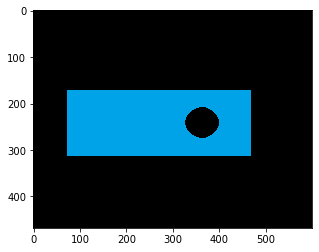

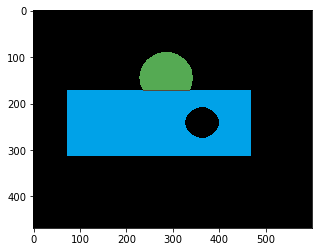

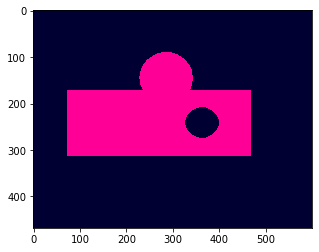

Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 1
True


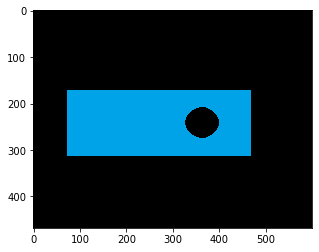

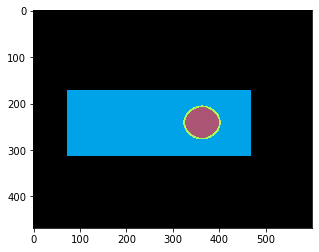

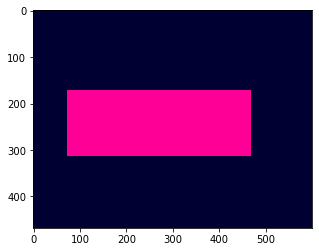

Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 1
True


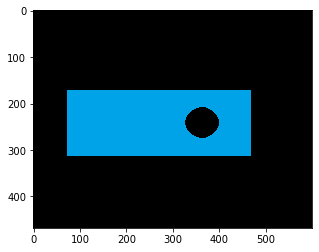

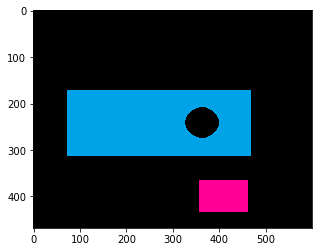

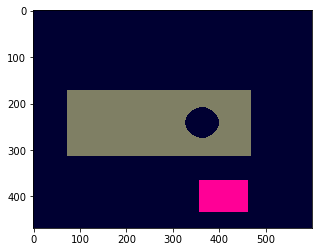

Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 2
False


In [47]:
def DilateImage(img):
    cv2.imshow('Original', img)

    kernel = np.ones((5, 5), 'uint8')

    dilate_img = cv2.dilate(img, kernel, iterations=2)
    plt.imshow(dilate_img, interpolation='nearest')
    plt.show()
    
    return dilate_img

def CheckConnectivity(img):
    connection=False
    label_pix=GetAllPixValues(img)
    BgPix=GetBgPixVal(img)
    label_pix=RemoveSpecificValue(label_pix,BgPix) 
    unq_label_pix=getUniqueListValue(label_pix)
    if(len(unq_label_pix)==1):
        connection=True
    else:
        connection=False
    return connection

for i in range(len(img_list2)):
    compareWithImg=DilateImage(img_list[1][0])
    mergeimg=compareWithImg+img_list2[i][0]
    plt.imshow(mergeimg, interpolation='nearest')
    plt.show()
    merge_label=ComponentLabeling(mergeimg)
    plt.imshow(merge_label, interpolation='nearest')
    plt.show()
    print(CheckConnectivity(merge_label))
    